# Example plotting from the docs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import mesa_reader to make its classes accessible
import mesa_reader as mr

## Working with history.data

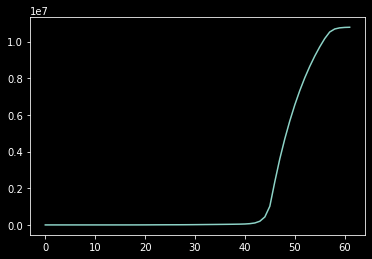

In [3]:
# make a MesaData object from a history file
h = mr.MesaData('LOGS/history.data')
# extract the star_age column of data
ages = h.data('star_age')
# or do it more succinctly
ages = h.star_age
plt.plot(ages)

## Working with profile#.data

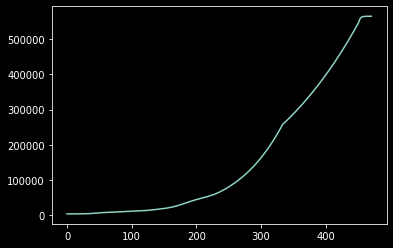

In [4]:
# load the profile file into a MesaData instance
p = mr.MesaData('LOGS/profile1.data')
# access the temperature column of data
temperatures = 10 ** p.logT
plt.plot(temperatures)

Now comes a couple of ways to load profiles without having to know the profile number.

MESA model #    100, t =           2299.98949 yr MESA model #    300, t =          10770238.19 yr MESA model #    305, t =          10779792.47 yr


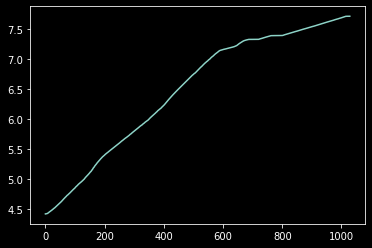

In [5]:
l = mr.MesaLogDir('./LOGS')

# load the profile associated with model number 100
p_100 = l.profile_data(100)
# the same as the following
p_100 = l.profile_data(model_number=100)

# load the profile with PROFILE number 9
p_9 = l.profile_data(profile_number=9)

# load the last profile saved (largest model number)
p_last = l.profile_data()

print(p_100, p_9, p_last)

plt.plot(p_last.logT)

## Creation of an HR diagram

Let's create an HR diagram

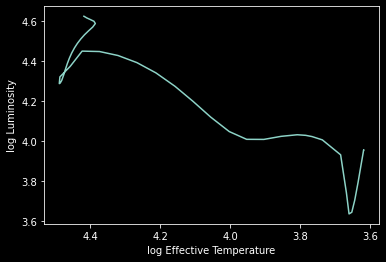

In [8]:
# start pylab mode
# %pylab

# %matplotlib inline

# import mesa_reader
import mesa_reader as mr

# load and plot data
h = mr.MesaData('LOGS/history.data')
plt.plot(h.log_Teff, h.log_L)

# set axis labels
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')

# invert the x-axis
plt.gca().invert_xaxis()

## Creating a temperature-density profile

Text(0, 0.5, 'Temperature')

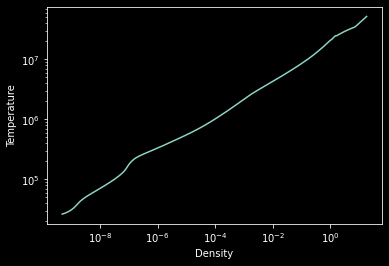

In [10]:
# load entire LOG directory information
l = mr.MesaLogDir('./LOGS')
# grab the last profile
p = l.profile_data()

# this works even if you only have logRho and logT!
plt.loglog(p.Rho, p.T)
plt.xlabel("Density")
plt.ylabel("Temperature")

# Example plotting with mesaplot
https://github.com/rjfarmer/mesaplot

There are created examples in the linked repo.

In [20]:
import mesaPlot as mp
m=mp.MESA()

## Working with history.data
This loads up the history file data by default it will look for LOGS/history.data.

In [16]:
# alternatively for other dirs
#m.log_fold='new_folder/LOGS/' #, or
# m.loadHistory(f='new_folder/LOGS/')

m.loadHistory()

Note this will automatically clean the history data of retries, backups and restarts. To write that data back to disk

In [18]:
#m.scrubHistory()

## Working with profile#.data

In [24]:
m.loadProfile(prof='10')

#Again you change the LOGS folder either with log_fold or f=. To choose which file to load, either:
#m.loadProfile(num=MODEL_NUMBER)
#or
#m.loadProfile(prof=PROFILE_NUMBER)

/home/yousousen/.local/lib/python3.10/site-packages/mesaPlot-0.0.0-py3.10.egg/mesaPlot/file_reader.py:742: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pos = np.where(prof_nums == prof)[0][0]


IndexError: index 0 is out of bounds for axis 0 with size 0

## Example plotting

ValueError: no field of name log_center_T

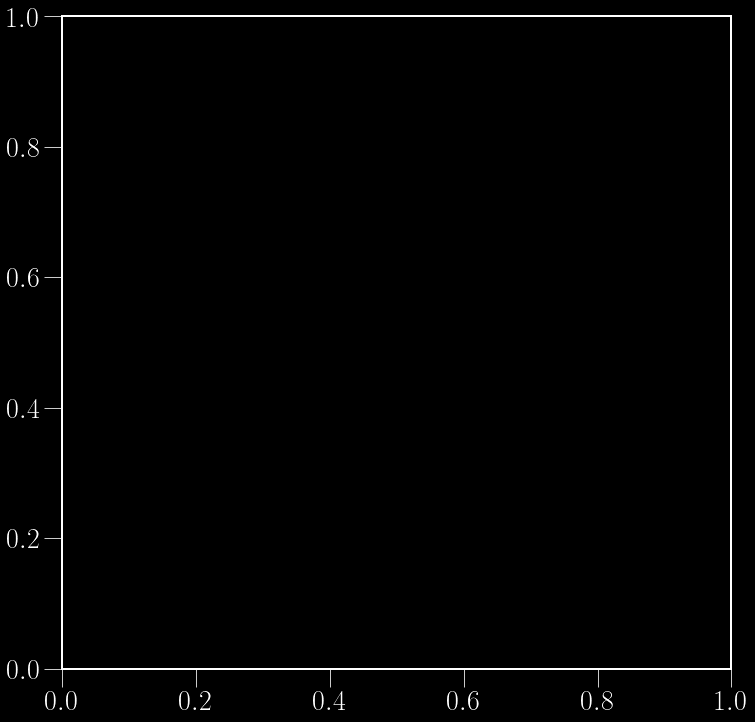

In [30]:
m=mp.MESA()
p=mp.plot()
m.loadHistory()
p.plotHistory(m,xaxis='star_age',y1='log_center_T',y2='he_core_mass')

LOGS//profile8.data


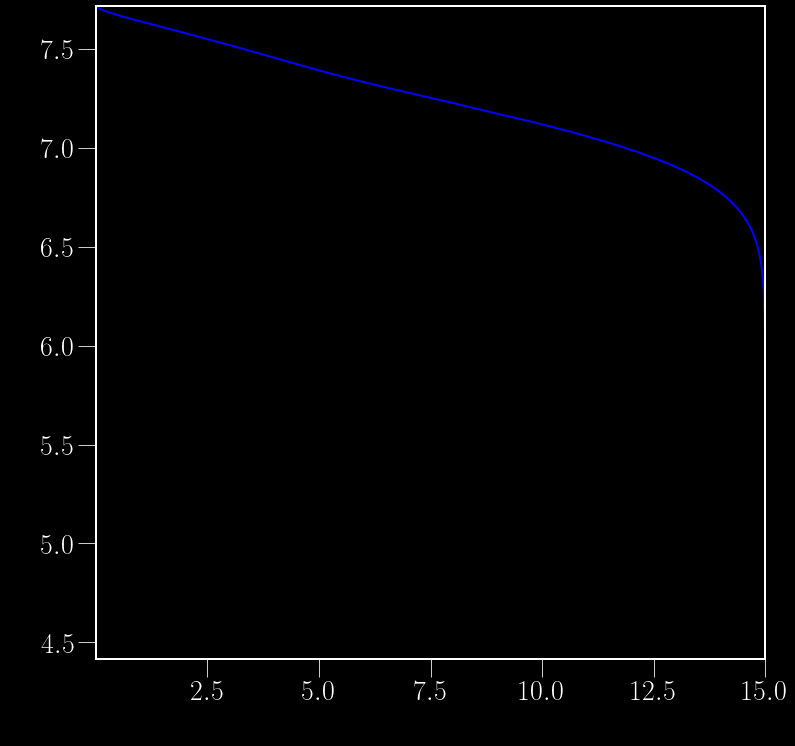

In [32]:
m=mp.MESA()
p=mp.plot()
m.loadProfile(num=-1)
#p.plotProfile(m,xaxis='mass',y1='logT',y2='ye')
p.plotProfile(m,xaxis='mass',y1='logT')

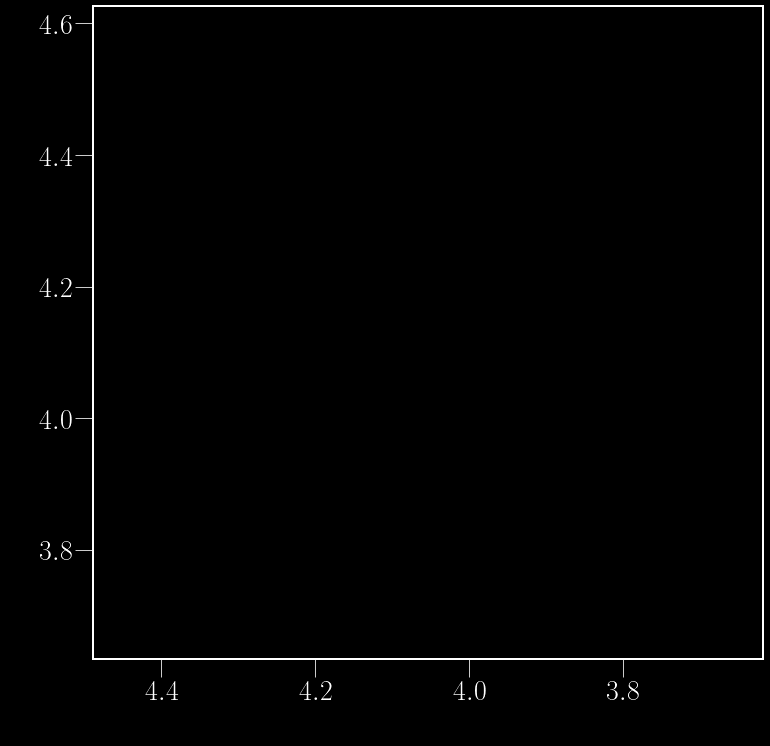

In [33]:
m=mp.MESA()
p=mp.plot()
m.loadHistory()
p.plotHR(m)